# **Experimentacion con el algortimos TF-IDF**

# Importacion de librerias necesarios 

In [ ]:
import nltk
import re, string, unicodedata
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
import nltk
nltk.download('all')
!pip install pandas_ods_reader

In [ ]:
def CleanWOrds(words,Clean_Words):
   
    def remove_non_ascii(words):
        #"""Elimine los caracteres que no son ASCII de la lista de palabras"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize(
                'NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    def to_lowercase(words):
    #"""Convierte todos los caracteres a minúsculas de la lista de palabras """
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(words):
        #"""Eliminar puntuación de la lista de palabras tokenizadas"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(words):
        #"""Reemplace todas las apariciones de enteros en la lista 
        #de palabras con token con representación textual"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                #new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(words):
        #"""Eliminar palabras vacias de la lista de palabras en token"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words


    def lemmatize_verbs(words):
        #"""Lemmatizar verbos en lista de palabras tokenizadas"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def normalize(words):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        words = remove_stopwords(words)
        words = lemmatize_verbs(words)
        return words
    words = normalize(words)
    #print (user,"\n",words)
    
    Clean_Words=Clean_Words.append(words)
    return (words,Clean_Words)


# Lectura de datos de papers

In [ ]:
import pandas as pd  
Papers = pd.read_csv("/content/drive/MyDrive/RESEARCH/Thesis/Carmen/data/DatasetC.csv", delimiter=",", error_bad_lines=False, encoding='latin1') 
Papers.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,nro,Tipo de Documento,Area,Titulo,Autor,Keywords,url,FUENTE,AniO,ABSTRACT
0,1,paper,computer vision,Vision-Face Recognition Attendance Monitoring ...,J. Harikrishnanÿ;ÿArya Sudarsanÿ;ÿAravind Sada...,"Face Attendance, Face detection, face recognit...",https://ieeexplore.ieee.org/document/8899418,ieee,2019.0,"Nowadays, Artificial Neural networks can be tr..."
1,2,paper,computer vision,Cost effective and reliable mobile solution fo...,N Pradeesh ; VS Sreejesh Kumar ; AS Anand ; V ...,"Wireless body area networks, physical layer se...",https://ieeexplore.ieee.org/document/8986206,ieee,2019.0,Attendance marking is a critical and time-cons...
2,3,paper,computer vision,Development of model for automatic tutor in e-...,Salma Boumiza ; Alexander Bekiarski ; Dalila S...,"Face detection, face recognition, viola Jones,...",https://ieeexplore.ieee.org/document/7955493,ieee,2017.0,"In e-learning environment, the main function o..."
3,4,paper,computer vision,An Advancement towards Efficient Face Recognit...,Jalendu Dhamija ; Tanupriya Choudhury ; Pravee...,"Face recognition, Live video feed, face detect...",https://ieeexplore.ieee.org/document/8307330,ieee,2017.0,Image based or live video feed based face reco...
4,5,paper,computer vision,A Survey on Computer Vision for Assistive Medi...,Jerome Thevenot; MiguelBordallo Lopez; Abdenou...,"Computer vision, face analysis, facial symptom...",https://ieeexplore.ieee.org/document/8059954,ieee,2017.0,Automatic medical diagnosis is an emerging cen...


In [ ]:
print(Papers.shape)
print(Papers.value_counts(Papers['Area'], sort = True))

(500, 10)
Area
computer vision                       110
time series forecasting/prediction    100
personalized learning                  90
Data Mining                            70
Internet Security                      70
Deep Learning                          60
dtype: int64


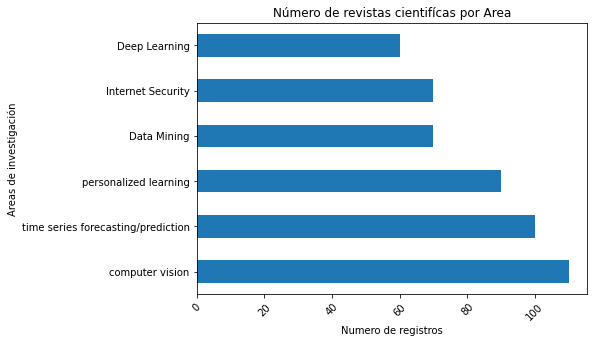

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(Papers)))
count_classes = Papers.value_counts(Papers['Area'], sort = True)
count_classes.plot(kind = 'barh', rot=0, figsize=(7,5), stacked=True) #color=my_colors
#plt.xticks(range(8))

plt.title("Número de revistas cientifícas por Area")
plt.ylabel("Areas de investigación")
plt.xticks(rotation=45)
plt.xlabel("Numero de registros")
plt.savefig('num_rv.pdf', bbox_inches = 'tight')

In [ ]:
plt.savefig('num_rv.png')

<Figure size 432x288 with 0 Axes>

# Lectura de datos de tesis

Los estudiantes que deseen buscar unposible tema y descripcion de su tema

In [ ]:

import pandas as pd  
Tesis = pd.read_csv("/content/drive/MyDrive/RESEARCH/Thesis/Carmen/data/TESIS_UNAM.csv", delimiter=",", error_bad_lines=False, encoding='latin1') 
Tesis.head(50)

,NÂ°,Autor,Area,Titulo,abstract,Url
0,1,"Mamani Padilla, Diego Ismael",Data mining,Data mining model based on associated factors ...,The following research project aims to develop...,https://repositorio.unam.edu.pe/handle/UNAM/94
1,2,"Valero GÃ³mez, Juan Carlos",Computer vision,Analysis of predictive models based on compute...,The following final thesis report has the purp...,https://repositorio.unam.edu.pe/handle/UNAM/91
2,3,"Condori Bellido, Sadan Eusebio",Data mining,Data mining model for predicting cases of anem...,"At present, anemia is a disease that affects 2...",https://repositorio.unam.edu.pe/handle/UNAM/101
3,4,"Apaza Alanoca, Honorio","Text mining, Natural Language Processing",Text mining to build a data mining model for j...,In the XXI century digital technology and the ...,https://repositorio.unam.edu.pe/handle/UNAM/84
4,5,"Castro Alvarez, Gregorio Tomas",Computer vision,Application of intelligent algorithms for auto...,"We developed a research work: ""IMPLEMENTATION ...",https://repositorio.unam.edu.pe/handle/UNAM/98
5,6,"Mamain Laqui, Marcos Rufino",Data mining,Optimization of distribution unit routes apply...,The work presented in this document is aimed a...,http://repositorio.unam.edu.pe/handle/UNAM/228
6,7,"Huerta Laura, Luis Enrique",Data mining,Prediction Model Of Customers Who Will unscrib...,The research arises from observing the behavio...,http://repositorio.unam.edu.pe/handle/UNAM/246
7,8,"Machaca Huanca, Anamelba Lissette",Computer vision,Diagnosis of diabetic retinopathy using classi...,Diabetic Retinopathy is a complication of Diab...,http://repositorio.unam.edu.pe/handle/UNAM/247
8,9,"Cruz Diaz, Jafet Andres",System information,Information System for the Control and Documen...,The present investigation entitled: âInforma...,http://repositorio.unam.edu.pe/handle/UNAM/241
9,10,"Moron Cuaquira, Alonso",Data mining,Predition of irregular consumiption of drinkki...,This research work focuses on the experimentat...,XXXXX


In [ ]:
#LECTURA DE TESIS
df_tesis_titulo = Tesis[['Titulo']]
df_tesis_abstract=Tesis[['abstract']]
#LECTURA DE PAPERS
df_paper_Area=Papers[['Area']]
df_paper_Titulo=Papers[['Titulo']]
df_paper_Keywords=Papers[['Keywords']]
df_paper_ABSTRACT=Papers[['ABSTRACT']]

In [ ]:
df_tesis_titulo

,Titulo
0,Data mining model based on associated factors ...
1,Analysis of predictive models based on compute...
2,Data mining model for predicting cases of anem...
3,Text mining to build a data mining model for j...
4,Application of intelligent algorithms for auto...
5,Optimization of distribution unit routes apply...
6,Prediction Model Of Customers Who Will unscrib...
7,Diagnosis of diabetic retinopathy using classi...
8,Information System for the Control and Documen...
9,Predition of irregular consumiption of drinkki...


In [ ]:
txt_corpus=Papers['Area']+" "+Papers['Titulo']+" "+Papers['Keywords']+" "+Papers['ABSTRACT']
txt_corpus

0      computer vision Vision-Face Recognition Attend...
1      computer vision Cost effective and reliable mo...
2      computer vision Development of model for autom...
3      computer vision An Advancement towards Efficie...
4      computer vision A Survey on Computer Vision fo...
                             ...                        
495    Deep Learning Applying Deep Learning to Balanc...
496    Deep Learning Deep Learning for Augmented Real...
497    Deep Learning Traffic signs recognition with d...
498    Deep Learning Deep Learning with Multi Modal E...
499    Deep Learning Iterative Deep Learning Based Un...
Length: 500, dtype: object

In [ ]:
df_tesis_titulo.shape[0]

10

# Algortimo TF-IDF

In [ ]:
cadena=[]

for tesis in range(df_tesis_titulo.shape[0]):
  str1, str2="",""
  ts_titulo=str1.join(df_tesis_titulo.iloc[tesis])
  ts_abstract=str2.join(df_tesis_abstract.iloc[tesis])
  #print(ts_titulo)
  Clean_Words=[]
  words = nltk.word_tokenize(ts_titulo+" "+ts_abstract)
  #words = nltk.word_tokenize(ts_titulo)
  CleanWOrds(words,Clean_Words)
  text_research=Clean_Words
  #print("%%%%%%%%%%%",text_research[0])
  
  for paper in range(df_paper_Area.shape[0]):

    str1,str2,str3,str4="","","",""

    #limpieza de documentos(area, titulo, keywords, abstract)
    Clean_Words=[]
    words = nltk.word_tokenize(str1.join(df_paper_Area.iloc[paper]))
    CleanWOrds(words,Clean_Words)
    text_area=Clean_Words
    #print(text_area[0])

    Clean_Words=[]
    words = nltk.word_tokenize(str1.join(df_paper_Titulo.iloc[paper]))
    CleanWOrds(words,Clean_Words)
    text_titulo=Clean_Words
    #print(text_titulo[0])

    Clean_Words=[]
    words = nltk.word_tokenize(str1.join(df_paper_Keywords.iloc[paper]))
    CleanWOrds(words,Clean_Words)
    text_keywords=Clean_Words
    #print(text_keywords[0])

    Clean_Words=[]
    words = nltk.word_tokenize(str1.join(df_paper_ABSTRACT.iloc[paper]))
    CleanWOrds(words,Clean_Words)
    text_abstract=Clean_Words
    #print(text_abstract[0])


    #juntamos los todos documentos y texto de busqueda
    wordSet = set(text_research[0]).union(set(text_area[0])).union(set(text_titulo[0])).union(set(text_keywords[0])).union(set(text_abstract[0]))
    #wordSet = set(text_research[0]).union(set(text_keywords[0]))

    #print(wordSet)

    wordDictR = dict.fromkeys(wordSet, 0) 
    wordDictA = dict.fromkeys(wordSet, 0) 
    wordDictB = dict.fromkeys(wordSet, 0)
    wordDictC = dict.fromkeys(wordSet, 0)
    wordDictD = dict.fromkeys(wordSet, 0)
    #print(wordDictC)

    for word in text_research[0]:
        wordDictR[word]+=1
    for word in text_area[0]:
        wordDictA[word]+=1
    for word in text_titulo[0]:
        wordDictB[word]+=1
    for word in text_keywords[0]:
        wordDictC[word]+=1
    for word in text_abstract[0]:
        wordDictD[word]+=1
    
    #print(wordDictB)

    #Dataframe diccionario de corpus
    df_dicCorpus=pd.DataFrame([wordDictR,wordDictA, wordDictB, wordDictC, wordDictD])
    
    #Calculando frecuencia de terminos
    def computeTF(wordDict, bow):
      tfDict = {}
      bowCount = len(bow)
      for word, count in wordDict.items():
          tfDict[word] = count/float(bowCount)
      return tfDict

    tfBowR = computeTF(wordDictR, text_research[0])
    tfBowA = computeTF(wordDictA, text_area[0])
    tfBowB = computeTF(wordDictB, text_titulo[0])
    tfBowC = computeTF(wordDictC, text_keywords[0])
    tfBowD = computeTF(wordDictD, text_abstract[0])
    
    #print(tfBowR)
    
    #Calculando frecuencia inversa de documentos 
    def computeIDF(docList):
      import math
      idfDict = {}
      N = len(docList)
      
      idfDict = dict.fromkeys(docList[0].keys(), 0)
      for doc in docList:
          for word, val in doc.items():
              if val > 0:
                  idfDict[word] += 1
      
      for word, val in idfDict.items():
          idfDict[word] = math.log10(N / float(val))
          
      return idfDict

    idfs = computeIDF([wordDictR, wordDictA, wordDictB, wordDictC, wordDictD])

    #calculando el producto tf * idf
    def computeTFIDF(tfBow, idfs):
      tfidf = {}
      relvants={}
      zumm=0
      for word, val in tfBow.items():
          tfidf[word] = val*idfs[word]
          if (tfidf[word]!=0):
            relvants[word]=val*idfs[word]
            zumm=zumm+tfidf[word]

      avrg=round(zumm/len(relvants),6)
      cadena.append(tesis)
      cadena.append(paper)
      cadena.append(avrg)
      #print("**********************************",tesis,paper,avrg)
      return (tfidf, relvants,avrg)

    tfidfBowR = computeTFIDF(tfBowR, idfs)
    #tfidfBowA = computeTFIDF(tfBowA, idfs)
    #tfidfBowB = computeTFIDF(tfBowB, idfs)
    #tfidfBowC = computeTFIDF(tfBowC, idfs)
    #tfidfBowD = computeTFIDF(tfBowD, idfs)

    #df_TFIDF=pd.DataFrame([tfidfBowR, tfidfBowA, tfidfBowB,tfidfBowC, tfidfBowD])

   

  #print(text_research[0])




In [ ]:
df_dicCorpus.head()

,introduce,network,active,masksimages,method,interest,label,record,incidents,depth,precision,algorithms,data,class,experimentation,learningof,edf,exist,asa,research,unbiased,annotation,mask,humanintheloop,verify,enough,rate,newly,identify,stereology,irregular,different,better,random,ilo,learn,finally,prestadora,company,algorithm,...,less,water,user,build,consumption,apply,users,tedious,count,efficient,case,consumiption,extend,model,manual,major,improve,kind,image,call,cells,define,decision,deep,behave,belong,saneamiento,drinkking,error,train,iterative,regions,forest,iterations,sa,reduce,solve,eps,paper,predition
0,0,1,0,0,0,0,0,2,1,0,3,2,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4,1,1,1,1,2,2,1,1,1,...,0,2,0,0,3,0,1,0,0,1,2,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,2,1,2,0,0,1,0,0,1,0,0,0,2,1,1,0,3,1,1,0,2,1,1,1,0,3,0,0,0,0,0,8,0,0,0,2,...,1,0,2,1,0,1,0,1,2,0,0,0,1,3,1,1,1,0,2,1,2,0,0,6,0,0,0,0,1,2,3,1,0,1,0,1,0,0,1,0


# Exportacion de resultados

In [ ]:
import csv
with open('TF-IDF_Carmen.csv', 'w') as csvfile:
    fieldnames = ['Id_Tesis','Id_Paper','TF-IDF']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    word=0
    for i in range(int(len(cadena)/3)):
        
        #for j in range(int(len(i)/3)):
        Id_Cv1=cadena[word]
        #print(Id_Cv1)
        Id_Cv2=cadena[word+1]
        #print(Id_Cv2)
        Rating_general=cadena[word+2]
        #print(Rating_general)
        writer.writerow({'Id_Tesis': Id_Cv1,
                         'Id_Paper':Id_Cv2,
                         'TF-IDF':Rating_general })
        cont=word+2
        word=cont+1

# Visualizacion de resultados

In [ ]:
import pandas as pd  
matrix = pd.read_csv("TF-IDF_Carmen.csv", delimiter=",", error_bad_lines=False, encoding='latin1') 
matrix.head(500000)

,Id_Tesis,Id_Paper,TF-IDF
0,0,0,0.006807
1,0,1,0.006864
2,0,2,0.006490
3,0,3,0.006541
4,0,4,0.006766
...,...,...,...
4995,9,495,0.010659
4996,9,496,0.010785
4997,9,497,0.010838
4998,9,498,0.010651


In [ ]:
ratings_df = pd.DataFrame(matrix, columns = ['Id_Tesis', 'Id_Paper', 'TF-IDF'])
ratings_df.head()

,Id_Tesis,Id_Paper,TF-IDF
0,0,0,0.006807
1,0,1,0.006864
2,0,2,0.006490
3,0,3,0.006541
4,0,4,0.006766


In [ ]:
R_df = ratings_df.pivot(
    index = 'Id_Paper', columns ='Id_Tesis', values = 'TF-IDF').fillna(0)
R_df.head(500)

Id_Tesis,0,1,2,3,4,5,6,7,8,9
Id_Paper,,,,,,,,,,
0,0.006807,0.006673,0.007675,0.006373,0.009227,0.016123,0.006108,0.008927,0.009124,0.010641
1,0.006864,0.006696,0.007753,0.006280,0.009555,0.017007,0.006081,0.009260,0.009344,0.010739
2,0.006490,0.006556,0.007485,0.005983,0.009052,0.016352,0.005729,0.008569,0.009101,0.010677
3,0.006541,0.006768,0.007410,0.006094,0.009139,0.017137,0.005908,0.009045,0.009573,0.010651
4,0.006766,0.006982,0.007720,0.006136,0.009563,0.017661,0.006104,0.008996,0.009714,0.011087
...,...,...,...,...,...,...,...,...,...,...
495,0.006458,0.006670,0.007675,0.006254,0.009947,0.016765,0.005925,0.009079,0.009691,0.010659
496,0.006819,0.006818,0.007692,0.006344,0.010104,0.016250,0.006173,0.009555,0.009973,0.010785
497,0.006720,0.006852,0.007483,0.006312,0.009395,0.016787,0.005983,0.008987,0.009305,0.010838


In [ ]:
by_year = R_df.sort_values(0,ascending=False)
by_year.head()

Id_Tesis,0,1,2,3,4,5,6,7,8,9
Id_Paper,,,,,,,,,,
371,0.007060,0.007190,0.007933,0.006463,0.010235,0.017922,0.006277,0.009671,0.010130,0.011211
119,0.007060,0.007189,0.007948,0.006456,0.010060,0.017922,0.006354,0.009757,0.010130,0.011274
408,0.007060,0.007258,0.007978,0.006446,0.010279,0.017922,0.006354,0.009671,0.009950,0.011274
392,0.007036,0.007235,0.007950,0.006463,0.010052,0.017791,0.006296,0.009559,0.010130,0.011211
380,0.007036,0.007281,0.007893,0.006334,0.010279,0.017791,0.006354,0.009708,0.010012,0.011211


In [ ]:
# CONSULTAS DE TESIS / BUSQUEDAS
Id_tesis=3
str1, str2="",""
ts_titulo=str1.join(df_tesis_titulo.iloc[Id_tesis])
ts_abstract=str2.join(df_tesis_abstract.iloc[Id_tesis])
txt_research=ts_titulo+" "+ts_abstract
print("DATOS DEL TESIS / BUSQUEDA")
print(ts_titulo)
print(ts_abstract)
print("\n")
#CONSULTAS DE PAPERS 
Id_paper=28
str1,str2,str3,str4="","","",""
pp_area=str1.join(df_paper_Area.iloc[Id_paper])
pp_titulo=str2.join(df_paper_Titulo.iloc[Id_paper])
pp_keywords=str3.join(df_paper_Keywords.iloc[Id_paper])
pp_abstract=str4.join(df_paper_ABSTRACT.iloc[Id_paper])
print("DATOS DEL PAPER")
print(pp_area)
print(pp_titulo)
print(pp_keywords)
print(pp_abstract)

DATOS DEL TESIS / BUSQUEDA
Text mining to build a data mining model for job offers recommendation
In the XXI century digital technology and the internet has generated satisfaction in many aspects to the daily life of human beings, this research focuses on the problem of how can be taken advantage of additionally the growth of unstructured information on job offers and curriculum vitae in different web sites to recommend job offers. Since this information is written in human language and the computers can not interpret the information in natural language. Recommendation systems need a numerical value on the likes and dislikes of users to make recommendation lists based on collaboration or similarity of content. However, in the present investigation the information to be considered are the relevant terms or words that describe the candidate, experiences and abilities. This research focuses on the process of text mining, which consists of the process of structuring the data model based on

# **EJEMPLO**

[Fuente del ejemplo ](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/)

In [ ]:
import pandas as pd
import sklearn as sk
import math 


In [ ]:
docA = "The cat sat on my face"
docB = "The dog sat on my bed"
docC = "The honorio sar on my office"

In [ ]:
bowA = docA.split(" ")
bowB = docB.split(" ")
bowC = docC.split(" ")

In [ ]:
bowB

['The', 'dog', 'sat', 'on', 'my', 'bed']

In [ ]:
wordSet = set(bowA).union(set(bowB)).union(set(bowC))

In [ ]:
wordSet

{'The',
 'bed',
 'cat',
 'dog',
 'face',
 'honorio',
 'my',
 'office',
 'on',
 'sar',
 'sat'}

In [ ]:
wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0)
wordDictC = dict.fromkeys(wordSet, 0)

In [ ]:
wordDictA

{'The': 0,
 'bed': 0,
 'cat': 0,
 'dog': 0,
 'face': 0,
 'honorio': 0,
 'my': 0,
 'office': 0,
 'on': 0,
 'sar': 0,
 'sat': 0}

In [ ]:
for word in bowA:
    wordDictA[word]+=1
    
for word in bowB:
    wordDictB[word]+=1

for word in bowC:
    wordDictC[word]+=1

In [ ]:
wordDictA

{'The': 1,
 'bed': 0,
 'cat': 1,
 'dog': 0,
 'face': 1,
 'honorio': 0,
 'my': 1,
 'office': 0,
 'on': 1,
 'sar': 0,
 'sat': 1}

In [ ]:

import pandas as pd
pd.DataFrame([wordDictA, wordDictB, wordDictC])

,on,my,dog,sar,office,honorio,sat,The,cat,bed,face
0,1,1,0,0,0,0,1,1,1,0,1
1,1,1,1,0,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,1,0,0,0


In [ ]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [ ]:
tfBowA = computeTF(wordDictA, bowA)
tfBowB = computeTF(wordDictB, bowB)
tfBowC = computeTF(wordDictC, bowC)

In [ ]:
tfBowA

{'The': 0.16666666666666666,
 'bed': 0.0,
 'cat': 0.16666666666666666,
 'dog': 0.0,
 'face': 0.16666666666666666,
 'honorio': 0.0,
 'my': 0.16666666666666666,
 'office': 0.0,
 'on': 0.16666666666666666,
 'sar': 0.0,
 'sat': 0.16666666666666666}

In [ ]:
tfBowB

{'The': 0.16666666666666666,
 'bed': 0.16666666666666666,
 'cat': 0.0,
 'dog': 0.16666666666666666,
 'face': 0.0,
 'honorio': 0.0,
 'my': 0.16666666666666666,
 'office': 0.0,
 'on': 0.16666666666666666,
 'sar': 0.0,
 'sat': 0.16666666666666666}

In [ ]:
tfBowC

{'The': 0.16666666666666666,
 'bed': 0.0,
 'cat': 0.0,
 'dog': 0.0,
 'face': 0.0,
 'honorio': 0.16666666666666666,
 'my': 0.16666666666666666,
 'office': 0.16666666666666666,
 'on': 0.16666666666666666,
 'sar': 0.16666666666666666,
 'sat': 0.0}

In [ ]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [ ]:
idfs = computeIDF([wordDictA, wordDictB,wordDictC])


In [ ]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [ ]:

tfidfBowA = computeTFIDF(tfBowA, idfs)
tfidfBowB = computeTFIDF(tfBowB, idfs)
tfidfBowC = computeTFIDF(tfBowC, idfs)

In [ ]:
import pandas as pd
pd.DataFrame([tfidfBowA, tfidfBowB, tfidfBowC])

,on,my,dog,sar,office,honorio,sat,The,cat,bed,face
0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.029349,0.0,0.07952,0.00000,0.07952
1,0.0,0.0,0.07952,0.00000,0.00000,0.00000,0.029349,0.0,0.00000,0.07952,0.00000
2,0.0,0.0,0.00000,0.07952,0.07952,0.07952,0.000000,0.0,0.00000,0.00000,0.00000
